# V.1 Exploring the green reds
### a) Scatterplot matrix of red wine data

In [27]:
import matplotlib.pyplot as plt
import random
import pandas as pd

wine_data = pd.read_csv('.\winequality-red.csv', sep=';')

print(wine_data.shape)

(1599, 12)


In [28]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    #select good&bad quality 
    good_wine = wine_data.loc[wine_data['quality'] >= good_threshold]
    bad_wine = wine_data.loc[wine_data['quality'] <= bad_threshold]
    
    rows, cols = wine_data.shape
    fig, axes = plt.subplots(cols, cols, figsize=(20,20))
    plt.suptitle('Scatterplot matrix of red wine data', fontsize=26)
    
    for ax in axes.flat:
        # Hide labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        
    for i in range(cols):
        for j in range(cols):
            if (i != j):
                axes[i,j].plot(bad_wine.iloc[:,j], bad_wine.iloc[:,i], linestyle='none', marker='.', markersize='3', color='Purple')
                axes[i,j].plot(good_wine.iloc[:, j], good_wine.iloc[:,i], linestyle='none', marker='.', markersize='3', color='green')
    for i, col in enumerate(wine_data.columns):
        axes[i,i].text(0.5, 0.5, col, ha='center', va='center')
    plt.show
    if (save_plot == True):
        fig.savefig('./plot_scatter_matrix.png')

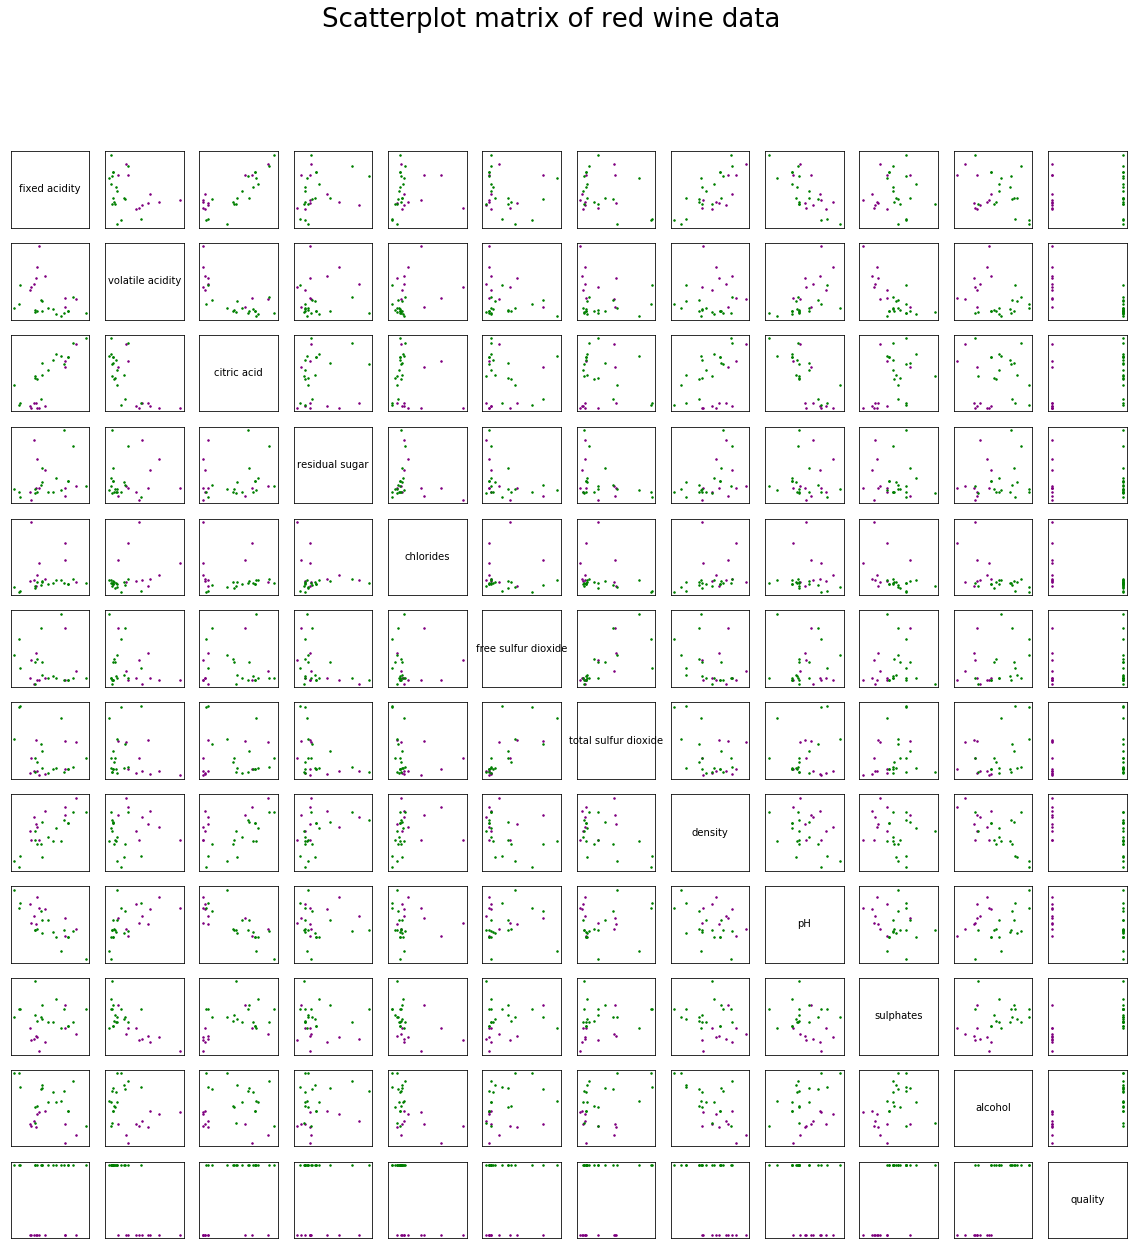

In [29]:
plot_scatter_matrix(wine_data, 8, 3, True)

### b) ...



# V.2 Learning to perceptron
### a) && b) Perceprton implementation

In [182]:
class Perceptron(object):
    def __init__(self, learningRate=0.01, epochs=50):
        self.learningRate = learningRate
        self.epochs = epochs
        self.weights = []
        self.performance = []
    def fit(self, X, y):
        #Initialize all weights to a small random number
        #weight[0] = the weight of the Bias Term
        random.seed(10)
        for i in range(X.shape[1]+1):
            self.weights.append(random.gauss(0.0, 0.001))
        for ep in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                y_predicted = yi - self.heaviside(xi)
                delta = self.learningRate * y_predicted
                self.weights[1:] += delta * xi
                self.weights[0] += delta
                errors += int(delta != 0.0)
                #print(errors)
                #[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]
            info = (ep, errors, self.weights[1:], self.weights[0])
            self.performance.append(info)
        return (self.performance)
    def heaviside(self, xi):
        res = self.weights[0]
        for i in range(1,len(self.weights)):
            res += xi[i-1] * self.weights[i]
        return (1 if res >= 0 else 0)

In [184]:
data = wine_data[(wine_data.quality >= 8) | (wine_data.quality <= 3)]
y = data['quality'].values
y = data.apply(lambda x: 1 if x['quality'] >= 8 else 0, axis=1)
ppn = Perceptron(learningRate=0.01, epochs=15000)
performance = ppn.fit(data[['pH', 'alcohol']].values, y.values)
#print(performance)

### c) Plot the performance of perceptron:
#### 1) plot the number of errors that perceptron made as a function of epoch
#### 2)  plot the decision boundary of perceptron and also show ‘good’ and ‘bad’ wine data points on the final training epoch.

In [185]:
def plot_performance(performance, data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    errors = []
    good_wine = data.loc[data['quality'] >= good_thresh]
    bad_wine = data.loc[data['quality'] <= bad_thresh]
    for i in performance:
        errors.append(i[1])
    fig = plt.figure(figsize=(15,5))
    pl1 = fig.add_subplot(1,2,1)
    pl2 = fig.add_subplot(1,2,2)
    pl1.plot(range(performance[len(performance) - 1][0]), errors[1:])
    pl1.set_ylabel('errors')
    pl1.set_xlabel('epochs')
    pl2.set_ylabel('pH')
    pl2.set_xlabel('alcohol')
    pl2.plot(good_wine['alcohol'], good_wine['pH'],linestyle='none', marker='.', markersize='7', color='Green')
    pl2.plot(bad_wine['alcohol'], bad_wine['pH'],linestyle='none', marker='.', markersize='7', color='Red')
    
    plt.show
#print(performance)

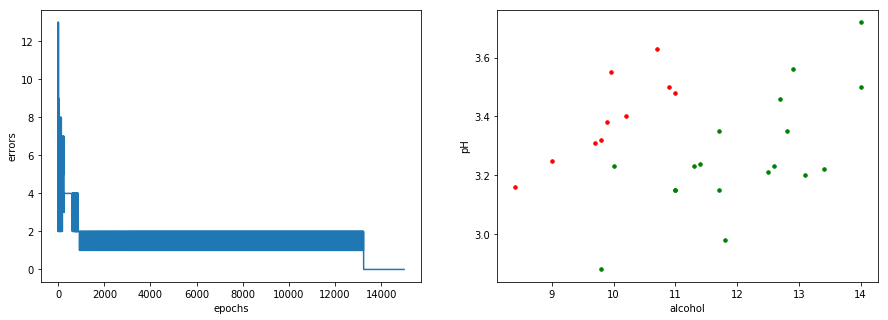

In [186]:
plot_performance(performance, data,8, 3)